<a href="https://colab.research.google.com/github/Ranga12891/Linear-Regression-Simple-Assigments/blob/main/Linear_Regression_Assignment5_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [65]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [66]:
df

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


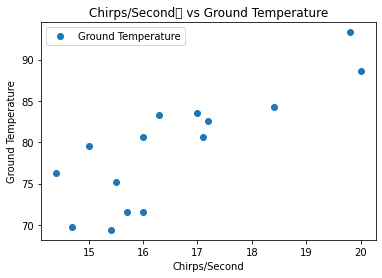

In [67]:
df.plot(x='Chirps/Second', y='Ground Temperature', style='o')
plt.title('Chirps/Second	 vs Ground Temperature')
plt.xlabel('Chirps/Second')
plt.ylabel('Ground Temperature')
plt.show()

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [68]:
# 1 Find the linear regression equation for this data.
X = df['Chirps/Second'].values
X = X.reshape(-1,1)
Y = df['Ground Temperature'].values
#Y = Y.reshape(-1,1)
X,Y

(array([[20. ],
        [16. ],
        [19.8],
        [18.4],
        [17.1],
        [15.5],
        [14.7],
        [15.7],
        [15.4],
        [16.3],
        [15. ],
        [17.2],
        [16. ],
        [17. ],
        [14.4]]),
 array([88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7, 71.6, 69.4, 83.3, 79.6,
        82.6, 80.6, 83.5, 76.3]))

In [69]:
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=1)

In [70]:
X_train.shape


(10, 1)

In [71]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * hours + c  
regressor.fit(X_train, y_train) #Learning happens - GD is done and we get the final values of m and c

LinearRegression()

In [72]:
y_pred = regressor.predict(X_test)
y_pred,y_test

(array([84.88975572, 76.80423716, 73.80960066, 89.08224682, 74.70799161]),
 array([84.3, 71.6, 69.7, 93.3, 79.6]))

In [73]:
m = regressor.coef_[0]
C = regressor.intercept_
print(m,C)
Label = "Prediction : Y=" + str(round(m,3)) + " X + " + str(round(C,3))
Label

2.9946365010483196 29.788444097713217


'Prediction : Y=2.995 X + 29.788'

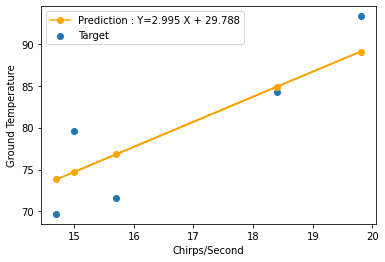

In [74]:
from matplotlib import markers
from pandas.io.formats import style
plt.scatter(X_test, y_test, label = "Target")
plt.plot(X_test, y_pred, label = Label,marker ='o',color = 'orange')
plt.legend()
plt.xlabel('Chirps/Second')
plt.ylabel('Ground Temperature')
plt.show()


In [75]:
# 3. R2 Score
R2_Score = regressor.score(X_test,y_test)
R2_Score

0.7685427938033862

'The R2_Score is less than 0.8. So the Equation is bad fit'

In [76]:
# Extrapolate

In [77]:
m,c = regressor.coef_,regressor.intercept_
m,c
GT = 95
Chrip_Rate = (GT - c) / m[0]
print("Chirp Rate : ",round(Chrip_Rate,1))

Chirp Rate :  21.8


In [78]:
GroundTemp = regressor.predict([[18]])
GroundTemp

array([83.69190112])

In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [80]:
df = pd.read_fwf("/content/drive/MyDrive/Data_Science/Assignment_5,6,7,8/brain_body.txt")

In [81]:
df.shape

(62, 2)

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


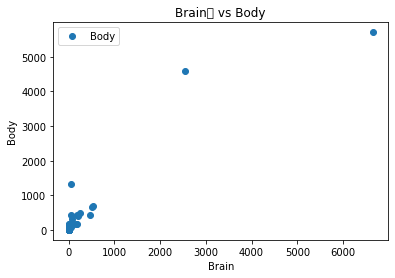

In [82]:
df.plot(x='Brain', y='Body', style='o')
plt.title('Brain	 vs Body')
plt.xlabel('Brain')
plt.ylabel('Body')
plt.show()

In [83]:
# Its clear the above graph that there is outlier in this data set
# Removing Outliers
df = df.loc[~(df.Brain >1000) & ~(df.Body >1000)]
df.shape

(59, 2)

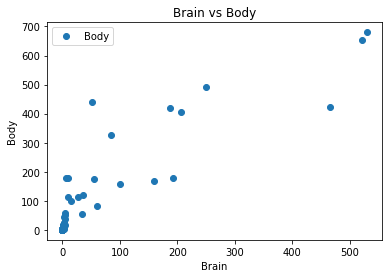

In [84]:
df.plot(x='Brain', y='Body', style='o')
plt.title('Brain vs Body')
plt.xlabel('Brain')
plt.ylabel('Body')
plt.show()

In [85]:
X = df.Brain.values
Y = df.Body.values
X = X.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=1)

In [86]:
X_train.shape

(41, 1)

Applying Linear regression

In [87]:
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
y_pred

array([ 40.72183471,  42.40158685,  40.65332717,  46.27226276,
        43.91665741,  40.78112008, 369.98619072, 287.11841842,
        41.6572261 , 293.57393645,  41.34762472, 653.23851259,
        40.63620028, 113.74164838,  40.88651629,  40.75608848,
        40.68626349, 737.55548282])

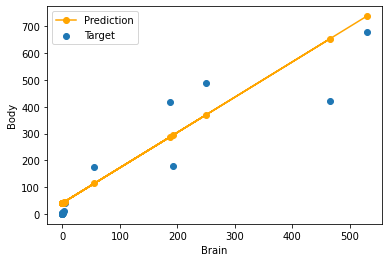

In [88]:
from matplotlib import markers
from pandas.io.formats import style
plt.scatter(X_test, y_test, label = "Target")
plt.plot(X_test, y_pred, label = "Prediction",marker ='o',color = 'orange')
plt.legend()
plt.xlabel('Brain')
plt.ylabel('Body')
plt.show()

R2_Score

In [89]:
Score = regressor.score(X_test,y_test)
print("R2 Score : ",Score)
print("Equation is Good fit") if Score > 0.8 else print("Equation is Bad fit")

R2 Score :  0.847256274155263
Equation is Good fit


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [90]:
df = pd.read_fwf("/content/drive/MyDrive/Data_Science/Assignment_5,6,7,8/salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
df.shape

(52, 6)

In [91]:
Y = df.iloc[:,5].values
Scores = []
names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"]

In [92]:
for i in range (0,5):
  X = df.iloc[:,i].values
  X = X.reshape(-1,1)
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=1)
  regressor.fit(X_train,y_train)
  Reg_Score = regressor.score(X_test,y_test)
  Scores.append([names[i],round(Reg_Score,3)])

In [93]:
Scores

[['Sex', -1.429],
 ['Rank', 0.363],
 ['Year', 0.378],
 ['Degree', -0.636],
 ['YSdeg', -0.536]]

# Inference:

R_2 Value is minimum for the feature 'Sex'. So Sex is not the factor for ''Salary''